# Supervised Learning Algorithms: Logistic Regression

<b>Logistic regression</b> is a statistical model used for analyzing datasets where there are one or more independent variables (features) that can be used to predict the outcome of a categorical dependent variable (target). It's particularly useful when the dependent variable is binary, meaning it has only two possible outcomes (e.g., 0 or 1, yes or no, true or false).
<b>Note: </b>For multi-class classification tasks (i.e., more than two classes), logistic regression can be extended using techniques like one-vs-all (also known as one-vs-rest) or softmax regression.

Some key points about logistic regression:
<ul>
    <li>
        <b>Binary Outcome:</b> As mentioned, logistic regression is used when the dependent variable is binary. For example, it could be used to predict whether a student will pass or fail an exam based on the number of hours they studied. (But, it can also be extended to multi-class classification tasks)
    </li>
    <li>
        <b>Note:</b> For multi-class classification tasks (i.e., more than two classes), logistic regression can be extended using techniques like one-vs-all (also known as one-vs-rest) or softmax regression.
    </li>
    <li>
        <b>Sigmoid Function:</b> The core of logistic regression is the sigmoid function, also known as the logistic function. The sigmoid function transforms any real-valued number to a value between 0 and 1. It is defined as follows:
    </li>
</ul>

$ \sigma(x) = \frac{1}{1 + e^{-x}} $ where,
$ x = x_{0} + \beta_{1} \times x_{1} + ... + \beta_{n} \times x_{n} $

In [200]:
# Importing necessary libraries
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale

In [201]:
# Defining Sigmoid function
def Sigmoid(X):
    return 1/(1 + np.exp(-X))

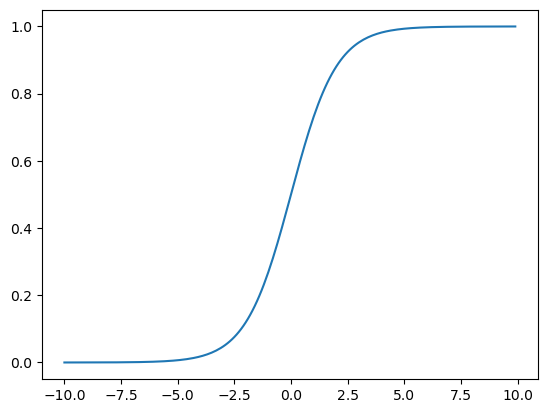

In [202]:
# Plotting Sigmoid function
X = list(x * 0.1 for x in range(-100, 100))
y = list(Sigmoid(x) for x in X )

plt.plot(X, y)
plt.show()

## Demo 1: Simple Logistic Regression

<b>Problem: </b> As a simple example, we can use a logistic regression with <b>one independet variable (feature)</b> and <b>one output (target)</b> to answer the following question:

A group of 20 students spends between 0 and 6 hours studying for an exam. How does the number of hours spent studying affect the probability of the student passing the exam?

The reason for using logistic regression for this problem is that the values of the dependent variable, pass and fail, while represented by "1" and "0", are not cardinal numbers. If the problem was changed so that pass/fail was replaced with the grade 0–100 (cardinal numbers), then simple regression analysis could be used.

The table shows the number of hours each student spent studying, and whether they passed (1) or failed (0).

Source: https://en.wikipedia.org/wiki/Logistic_regression

In [203]:
# Creating a data frame

hours_studying = [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]
pass_exam = [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

d = {'hours_studying':hours_studying, 'pass_exam':pass_exam}
df = pd.DataFrame(data = d)

In [204]:
df

,hours_studying,pass_exam
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


<AxesSubplot:>

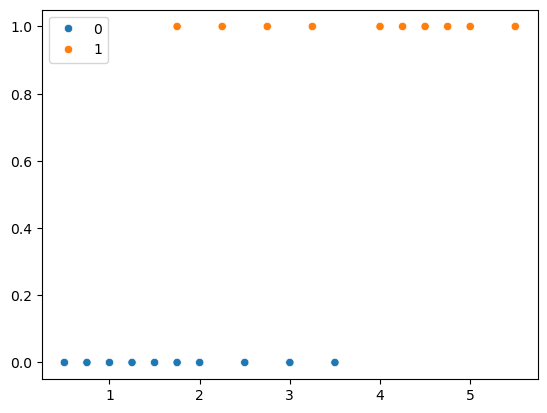

In [205]:
# Scattering the data points in the dataframe
sns.scatterplot(x = hours_studying, y = pass_exam, hue = pass_exam)

### Logistic Regression Model

$ P(y = 1 | X;\beta) = \sigma(X) = \frac{1}{1 + e^{-X}} $ where,
<br>
$ X = w_{0} + w_{1} \times x_{1}$
<br>
$ x_{1} $ is the hours studying
<br>
$ w_0 $ is the intercept and $ w_1 $ is the coefficient/slope of $x_1$

In [206]:
# Let's randomly initialize the coefficients
w_0 = random.uniform(-3, 3)
w_1 = random.uniform(-3, 3)

In [207]:
# Z is the linear combination of X and W
Z= w_0 + w_1 * df['hours_studying']

# y represents the sigmoid value of the linear combination of X and W (Z)
y = Sigmoid(Z)

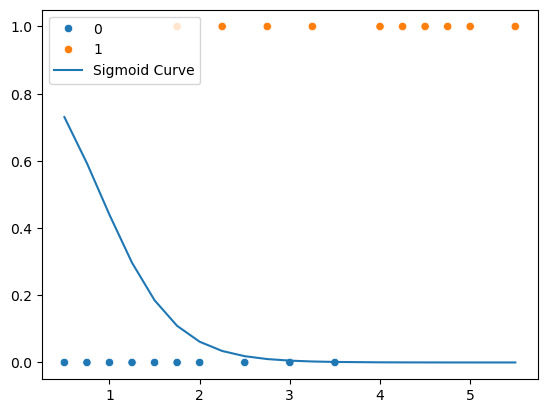

In [208]:
# Scattering the data points in the dataframe
sns.scatterplot(x = hours_studying, y = pass_exam, hue = pass_exam)
# Plotting the logistic regression curve with the coefficients w_0 and w_1
plt.plot(df['hours_studying'], y, label = 'Sigmoid Curve')

plt.legend(loc='upper left')

plt.show()

#### Let's compute the coefficients using Gradient Descent

In [209]:
# We define the loss/cost function binary cross-entropy
def cost_function(X, y, weights):
    # scores is the linear combination of X and weights/coefficients
    scores = np.dot(X, weights)
    # h is the sigmoid values of scores
    h = sigmoid(scores)
    
    return (-1/len(df)) * sum( (y*np.log(h)) + (1-y)*(np.log(1-h)) )

In [210]:
# Defining the features X and the output y
X = df[['hours_studying']]
y = df['pass_exam']

In [211]:
# shape returns the shape of an array
X.shape, y.shape

((20, 1), (20,))

In [212]:
def gradient_descent(X, y, learning_rate, nbr_steps):
    intercept = np.ones((X.shape[0], 1))
    X = np.hstack((intercept, X))
    weights = np.zeros(X.shape[1])
    m = len(df)
    for step in range(nbr_steps):
        scores = np.dot(X, weights)
        hypothesis = Sigmoid(scores)
        output_error_signal = hypothesis - y
        
        gradient = np.dot(X.T, output_error_signal)
        
        weights -= (learning_rate/m) * gradient
        
    return weights

In [213]:
w_0, w_1 = gradient_descent(df[['hours_studying']], df['pass_exam'], 0.001, 100000)
print(weights)

[-3.55481127  1.32855201]


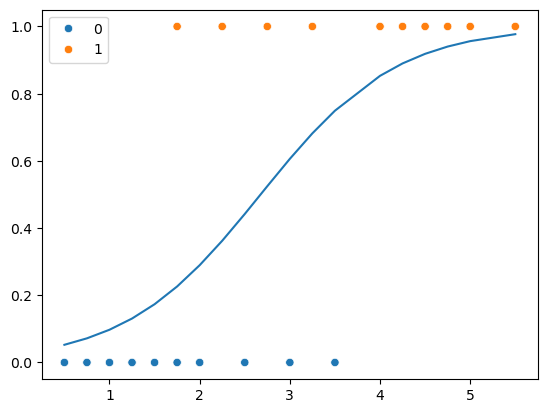

In [214]:
# Z is the linear combination of X and W
Z= w_0 + w_1 * df['hours_studying']

# y represents the sigmoid value of the linear combination of X and W (Z)
y = Sigmoid(Z)

# Scattering the data points in the dataframe
sns.scatterplot(x = hours_studying, y = pass_exam, hue = pass_exam)
# Plotting the logistic regression curve with the coefficients w_0 and w_1
plt.plot(df['hours_studying'], y)

plt.show()

#### Let's compare our results with sklearn's library

In [215]:
# Creating our sklearn model by intializing an instance of LogisticRegression()
sklearn_LR = LogisticRegression()
# Fitting the features to the output (computing the weights/parameters/coefficients)
sklearn_LR.fit(df[['hours_studying']], df['pass_exam'])

LogisticRegression()

In [216]:
# Getting the values of the intercept (theta_0) and the slope/weight of hours_studying X (theta_1)
sklearn_LR.intercept_, sklearn_LR.coef_

(array([-3.13952411]), array([[1.14860386]]))

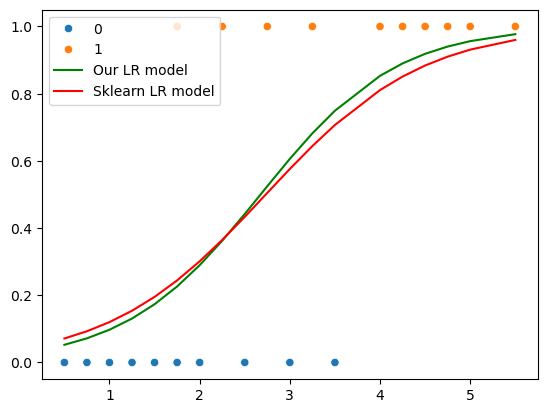

In [217]:
# Z is the linear combination of X and W for our model and the sklearn model
my_Z= w_0 + w_1 * df['hours_studying']
sklearn_Z= sklearn_LR.intercept_ + sklearn_LR.coef_[0] * df['hours_studying']

# y represents the sigmoid value of the linear combination of X and W (Z)
my_y = Sigmoid(Z)
sklearn_y = Sigmoid(sklearn_Z)

# Scattering the data points in the dataframe
sns.scatterplot(x = hours_studying, y = pass_exam, hue = pass_exam)
# Plotting the logistic regression curve with the coefficients w_0 and w_1
plt.plot(df['hours_studying'], my_y, color = 'green', label = 'Our LR model')
plt.plot(df['hours_studying'], sklearn_y, color = 'red', label = 'Sklearn LR model')

plt.legend(loc='upper left')


plt.show()

## Demo 2: Multiple Logistic Regression - Social Network Ads

<b>Problem: </b> A categorical dataset to determine whether a user purchased a particular product

In [218]:
# Importing a dataset using read_csv method in pandas
df = pd.read_csv("./Datasets/Social_Network_Ads.csv")

In [219]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [220]:
# Let's only consider two features (Age and EstimatedSalary) and one output (Purchased)
df = df[['Age', 'EstimatedSalary', 'Purchased']]

In [221]:
# the function describe() generates descriptive statistics of the numerical columns in the dataframe
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<b>Note:</b> The scale of Age is [min:18-max:60] and the scale of EstimatedSalary is [min:15000-max:150000], and the problem here is that Logistic Regression is sensetive to feature scaling with means features with different scales (min and max values).
<br>
<hr>
<br>
If the features have different scales, the optimization algorithm used to find the coefficients may take longer to converge or may not converge at all. Features with larger scales can dominate the learning process, as the updates to their corresponding coefficients will be larger. This can lead to suboptimal performance and longer training times.
<br>
<hr>
<br>
To address this issue, it's common practice to scale or normalize the features before fitting a logistic regression model. Standardization (subtracting the mean and dividing by the standard deviation) or normalization (scaling features to a specific range) can be used to ensure that all features contribute equally to the learning process.

### Results without feature scaling

In [222]:
## Considering two independent variables/features and one output (0 Not purchased, 1 Purchased)
features = ['Age', 'EstimatedSalary']
target = ['Purchased']

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

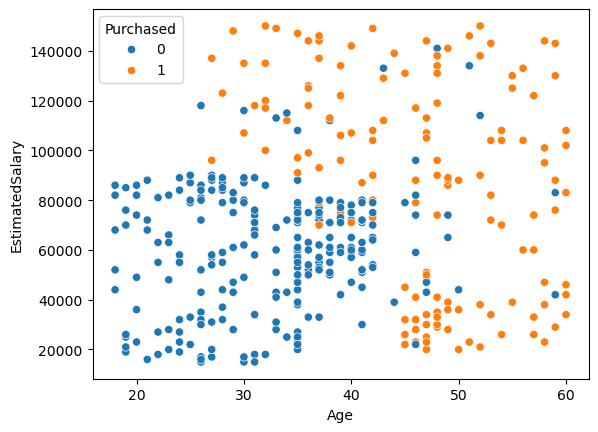

In [223]:
sns.scatterplot(x = df["Age"], y = df["EstimatedSalary"], hue = df.Purchased)

In [224]:
## Considering two independent variables/features and one output (0 Not purchased, 1 Purchased)
features = ['Age', 'EstimatedSalary']
target = ['Purchased']

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

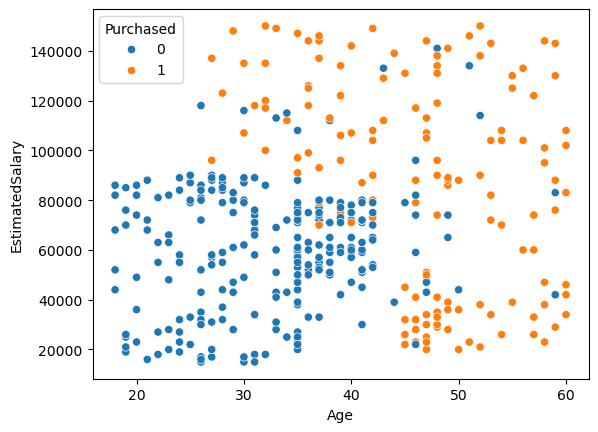

In [225]:
sns.scatterplot(x = df["Age"], y = df["EstimatedSalary"], hue = df.Purchased)

In [226]:
model_LR_no_scaling = LogisticRegression()

In [227]:
model_LR_no_scaling.fit(df[features], df.Purchased)

LogisticRegression()

In [228]:
predictions_no_scaling = model_LR_no_scaling.predict(df[features])

In [229]:
accuracy_score(df.Purchased, predictions_no_scaling)

0.6425

In [230]:
model_LR_no_scaling.intercept_, model_LR_no_scaling.coef_

(array([-2.24944689e-10]), array([[-2.10415172e-09, -2.69301403e-06]]))

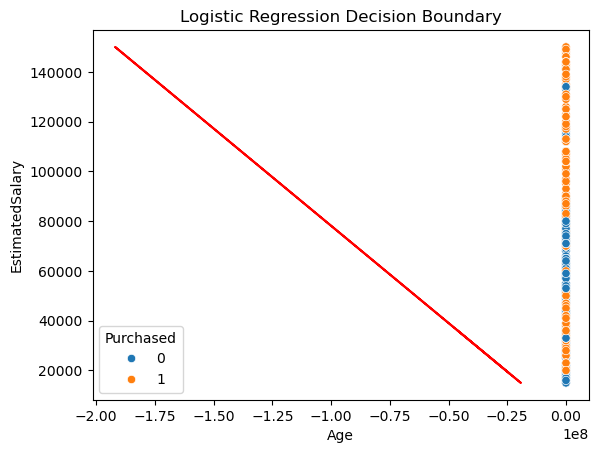

In [231]:
# Plot the decision boundary

sns.scatterplot(x = df["Age"], y = df["EstimatedSalary"], hue = df.Purchased)

# x1 reffers to Age column, x2 reffers to EstimatedSalary column
x2_vals = df.EstimatedSalary
x1_vals = -(model_LR_no_scaling.intercept_ + model_LR_no_scaling.coef_[0,1] * x2_vals) / model_LR_no_scaling.coef_[0,0]
plt.plot(x1_vals, x2_vals, 'r')

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

### Results with feature scaling (MinMax Normalization)

In [240]:
# Let's do feature scaling using MinMax Normalization
df.loc[:,['Age', 'EstimatedSalary']] = minmax_scale(df[['Age', 'EstimatedSalary']])

In [241]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,0.467976,0.405500,0.357500
std,0.249592,0.252570,0.479864
min,0.000000,0.000000,0.000000
25%,0.279762,0.207407,0.000000
50%,0.452381,0.407407,0.000000
75%,0.666667,0.540741,1.000000
max,1.000000,1.000000,1.000000


See! Now you have both features with the same scale [min:0-max:0]

In [234]:
model_LR_scaling = LogisticRegression()

In [235]:
model_LR_scaling.fit(df[features], df.Purchased)

LogisticRegression()

In [236]:
predictions_scaling = model_LR_scaling.predict(df[features])

In [237]:
accuracy_score(df.Purchased, predictions_scaling)

0.83

In [238]:
model_LR_scaling.intercept_, model_LR_scaling.coef_

(array([-4.55319723]), array([[5.535191  , 2.77997059]]))

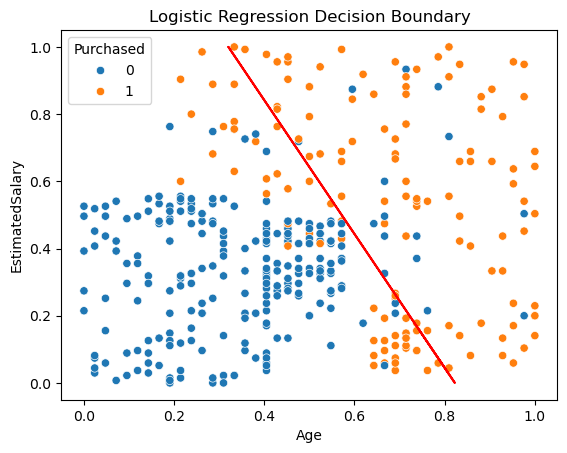

In [239]:
# Plot the decision boundary

sns.scatterplot(x = df["Age"], y = df["EstimatedSalary"], hue = df.Purchased)

# x1 reffers to Age column, x2 reffers to EstimatedSalary column
x2_vals = df.EstimatedSalary
x1_vals = -(model_LR_scaling.intercept_ + model_LR_scaling.coef_[0,1] * x2_vals) / model_LR_scaling.coef_[0,0]
plt.plot(x1_vals, x2_vals, 'r')

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

<b>TO-DO TASK: </b>Compute the coefficients using Gradien Descent and draw the decision boundary